<a href="https://colab.research.google.com/github/jiyeonjin/0624_new/blob/main/0710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mission :
1. 영상 저장 설정
2. 프레임 저장
3. output 리소스 정리
4. 결과 영상을 /content/lane_detection_result.mp4에 다운로드하게 만들어 주세요

# **1번 코드 요약 - 영상 처리에 필요한 라이브러리 임포트 + 영상 파일 경로 지정**

In [3]:
# 1.필요한 라이브러리 임포트
import cv2 # OpenCV 라이브러리 -> 영상 처리할 때 쓰인다.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display # Colab 환경에서 HTML 형식으로 무언가를 화면에 출력할 때 사용
from google.colab.patches import cv2_imshow
import os

# 설치된 OpenCV 버전 확인
print(f"OpenCV 버전: {cv2.__version__}")

# 영상 파일 경로 설정 (예시), 영상 파일의 경로를 변수로 저장해둠
video_path = '/content/강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].mp4'

OpenCV 버전: 4.11.0


# **2번 코드 요약 - yt-dlp로 유튜브 영상 다운로드 (Colab 환경에서)**

Colab 작업 폴더에 어떤 파일이 있는지 확인하는 코드입니다.

결과가 정상적으로 나오면 .mp4 파일이 /content에 있다는 뜻입니다. -> 유튜브 다운로드 성공

In [13]:
import os
os.listdir('/content')

['.config', '강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].mp4', 'sample_data']

In [8]:
# 2. yt-dlp 설치
!pip install yt-dlp # 유튜브 영상 다운로드 도구인 yt-dlp를 설치하는 명령어

# 원하는 유튜브 영상 다운로드
!yt-dlp -f bestvideo+bestaudio --merge-output-format mp4 https://www.youtube.com/watch?v=tEtWnGwwCEc
# 이 명령어를 실행하면 해당 유튜브 영상을 mp4 파일로 Colab 환경에 저장하게 된다.
# 보통 다운로드 후 /content 폴더 안에 영상 파일이 생긴다.

[youtube] Extracting URL: https://www.youtube.com/watch?v=tEtWnGwwCEc
[youtube] tEtWnGwwCEc: Downloading webpage
[youtube] tEtWnGwwCEc: Downloading tv client config
[youtube] tEtWnGwwCEc: Downloading player 6e20d3a8-main
[youtube] tEtWnGwwCEc: Downloading tv player API JSON
[youtube] tEtWnGwwCEc: Downloading ios player API JSON
[youtube] tEtWnGwwCEc: Downloading m3u8 information
[info] tEtWnGwwCEc: Downloading 1 format(s): 313+251
[download] 강남대로 강남역 도로 드라이브 최근 밤거리 모습 입니다. [tEtWnGwwCEc].mp4 has already been downloaded


# **3번 코드 요약 - 다운로드 받은 영상을 OpenCV와 Matplotlib로 한 프레임씩 화면에 출력 (영상 재생)**

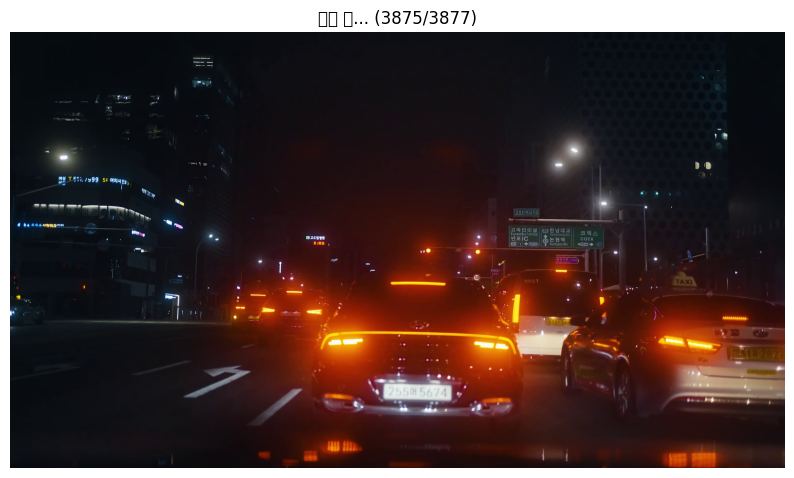

✅ 재생 완료!


In [11]:
# 3.
# 필요한 라이브러리 임포트
# 모두 Colab에서 실시간 영상 출력을 목적으로 만든 라이브러리이다.
import cv2
import yt_dlp
import matplotlib.pyplot as plt
import tempfile
import os
import time
from IPython.display import clear_output

# 아래부터는 유튜브 영상을 다운로드하고 재생하는 함수
# skip_frames: 프레임 건너뛰기 (1=모든 프레임, 2=한 프레임씩 건너뛰기)

def play_youtube_video(youtube_url, skip_frames=1):

    ydl_opts = {
        'format': 'mp4/best[height<=480]',  # 480p로 제한 (빠른 처리 위함)
        'outtmpl': tempfile.gettempdir() + '/temp_video.%(ext)s',
        'quiet': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print("⬇️ 영상 다운로드 중...")
            info = ydl.extract_info(youtube_url, download=True)

# 영상 재생 부분

            video_path = ydl.prepare_filename(info)

            cap = cv2.VideoCapture(video_path)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            print(f"🎬 '{info['title']}' 재생 시작!")
            print("(Ctrl+C로 중단)")

# 다운로드한 영상 경로로 OpenCV 캡처 객체 생성

            frame_num = 0
            while True:
                ret, frame = cap.read()
                if not ret:
                    break

# 프레임 건너뛰기

                if frame_num % skip_frames == 0:
                    clear_output(wait=True)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                    plt.title(f"재생 중... ({frame_num}/{frame_count})")
                    plt.axis('off')
                    plt.show()

# 재생 속도 조절

                    time.sleep(0.05)  # 0.1초 대기 (빠른 재생)

                frame_num += 1

# 마무리. 영상 파일 닫고, 임시 파일 삭제

            cap.release()
            os.remove(video_path)
            print("✅ 재생 완료!")

    except KeyboardInterrupt:
        print("\n⏹️ 재생 중단")
    except Exception as e:
        print(f"❌ 오류: {e}")

# 실행 부분. 직접 유튜브 주소를 입력하면 그 영상을 다운로드하고 재생해 준다.
youtube_url = input("YouTube URL: ")
play_youtube_video(youtube_url, skip_frames=5)  # 한 프레임씩 건너뛰어 빠른 재생

# **4번 코드 요약 - 차선 인식 및 결과 시각화 실제 구현 여부**

In [1]:
# 4.
import cv2
import glob # glob 추가 -> yt-dlp로 다운로드한 파일의 이름을 자동으로 video_path에 넣기 위함
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
import os # glob 사용시 필요



# 영상 경로 자동 설정
video_files = glob.glob('/content/*.mp4')
video_files.sort(key=os.path.getmtime, reverse=True)
video_path = video_files[0]
print(f"자동 설정된 영상 경로: {video_path}")


# 영상 파일 열기
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"📹 영상 정보: {frame_count}프레임, {fps:.2f}FPS")
print("🎬 차선 인식 시작! (Ctrl+C로 중단)")

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정 (mp4 형식)
out_path = '/content/lane_detection_result.mp4'  # 저장할 파일 경로
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))  # 저장용 객체 생성


frame_num = 0
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("📺 영상 재생 완료")
            break



        # 1. 그레이스케일 변환
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 2. 블러 → 에지(Canny) - 임계값 낮춤 (노이즈 제거)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blur, 30, 100)  # 50,150 → 30,100

        # 3. 관심영역 ROI 설정 - 영상 하단 30% 영역만 사용 (마스크 처리)
        height, width = edges.shape
        mask = np.zeros_like(edges)
        polygon = np.array([[
            (int(width * 0.1), height),            # 왼쪽 아래
            (int(width * 0.9), height),            # 오른쪽 아래
            (int(width * 0.6), int(height * 0.7)), # 오른쪽 위 (70% 지점)
            (int(width * 0.4), int(height * 0.7))  # 왼쪽 위 (70% 지점)
        ]])
        cv2.fillPoly(mask, polygon, 255)
        roi = cv2.bitwise_and(edges, mask)

        # 4. Hough Transform으로 직선 검출 - 파라미터 완화
        lines = cv2.HoughLinesP(roi, 2, np.pi / 180,
                               threshold=30,      # 50 → 30
                               minLineLength=30,  # 40 → 30
                               maxLineGap=80)     # 50 → 80

        # 5. 원본 영상에 검출한 선 그리기
        line_image = frame.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        out.write(line_image)  # 처리된 프레임을 결과 영상에 저장


        # 6. Matplotlib 으로 원본 영상과 차선 인식 결과 나란히 출력
        clear_output(wait=True)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"원본 프레임 {frame_num}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
        plt.title(f"차선 인식 결과 ({len(lines) if lines is not None else 0}개)")
        plt.axis('off')
        plt.show()

        frame_num += 1
        time.sleep(0.05)  # 10초마다 이걸 바꿔본다. 10초 딜레이는 너무 길다.

except KeyboardInterrupt:
    print("\n⏹️ 재생 중단")

cap.release()
out.release()
print(f"✅ 결과 영상이 '{out_path}'에 저장되었습니다.")

IndexError: list index out of range